<a href="https://colab.research.google.com/github/arpitarumma/feedforward/blob/main/NNDL6part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/DATASETS/archive (3).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['myeloblast', 'seg_neutrophil', 'monocyte', 'basophil', 'erythroblast']

In [ ]:
# Define dataset path
data_dir = os.path.join(os.getcwd(), "dataset")

In [ ]:
# Image parameters
img_size = (128, 128)
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [ ]:
# CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Evaluate the model
eval_result = model.evaluate(val_data)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")

# Save the model
model.save("cnn_image_classifier.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.5305 - loss: 1.0739 - val_accuracy: 0.8650 - val_loss: 0.4298
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8845 - loss: 0.3280 - val_accuracy: 0.9410 - val_loss: 0.1627
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9299 - loss: 0.2058 - val_accuracy: 0.9620 - val_loss: 0.1225
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9458 - loss: 0.1747 - val_accuracy: 0.9620 - val_loss: 0.1142
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9599 - loss: 0.1151 - val_accuracy: 0.9680 - val_loss: 0.1053
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9653 - loss: 0.1031 - val_accuracy: 0.9700 - val_loss: 0.0971
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9747 - loss: 0.0714 - val_accuracy: 0.9650 - val_loss: 0.1178
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9757 - loss: 0.0750 - val_accu

Validation Loss: 0.10730168223381042, Validation Accuracy: 0.9760000109672546


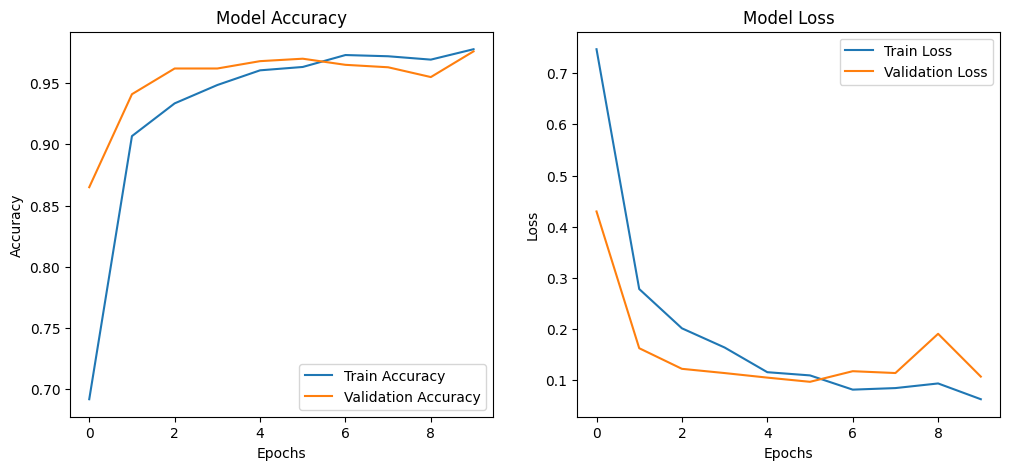

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Load model for classification
model = keras.models.load_model("cnn_image_classifier.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


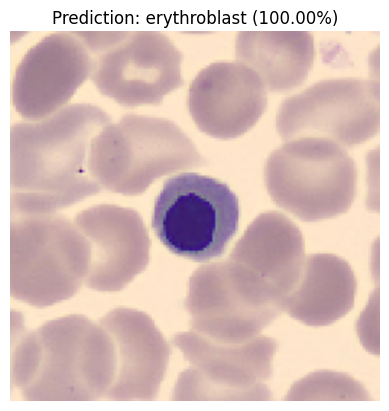

Predicted Class: erythroblast, Confidence: 100.00%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Define dataset path (update with your dataset location in Colab)
dataset_path = "/content/dataset"
model_path = "/content/cnn_image_classifier.h5"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Select an image for classification
img_path = "/content/dataset/erythroblast/ERB_474742.jpg"  # Update if needed
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Class labels from dataset directory names
class_names = sorted(os.listdir(dataset_path))
predicted_class_label = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]

# Display the image with prediction
plt.imshow(img)
plt.title(f"Prediction: {predicted_class_label} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()

print(f"Predicted Class: {predicted_class_label}, Confidence: {confidence*100:.2f}%")

In [ ]:
# prompt: use already existing cnn model in google colab

# Load a pre-trained model (e.g., MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom classification layers on top
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(5, activation='softmax') # Assuming 5 classes
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (you can use the same train_data and val_data as before)
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# ... (rest of your code for evaluation, saving, and prediction remains the same)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
 73/125 ━━━━━━━━━━━━━━━━━━━━ 22s 429ms/step - accuracy: 0.7061 - loss: 0.8111